In [1]:
# What version of Python do you have?
import sys
import platform
import torch
import pandas as pd
import sklearn as sk

has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-12.5.1-arm64-arm-64bit
PyTorch Version: 1.13.0.dev20220827

Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:00:33) 
[Clang 13.0.1 ]
Pandas 1.4.3
Scikit-Learn 1.1.2
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [2]:
#!pip install transformers

In [3]:
#!pip install -q youtube_transcript_api

In [4]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [5]:
youtube_video = "https://www.youtube.com/watch?v=ENb7Z6mY8c4"

In [6]:
video_id = youtube_video.split("=")[1]

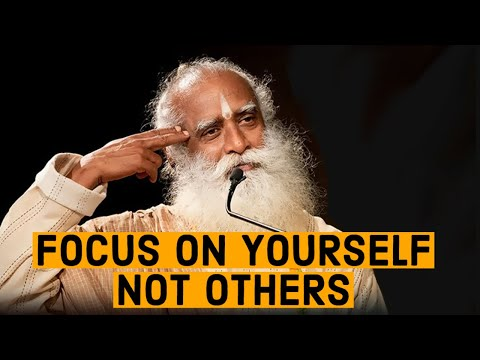

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
type(YouTubeVideo(video_id))

IPython.lib.display.YouTubeVideo

In [10]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [11]:
transcript

[{'text': "if you're not paying attention to what",
  'start': 0.08,
  'duration': 2.48},
 {'text': "i'm saying would you know what i'm",
  'start': 1.36,
  'duration': 3.04},
 {'text': 'talking', 'start': 2.56, 'duration': 2.64},
 {'text': 'no', 'start': 4.4, 'duration': 2.399},
 {'text': "that's so with every aspect of life",
  'start': 5.2,
  'duration': 2.719},
 {'text': "isn't it", 'start': 6.799, 'duration': 2.961},
 {'text': "you're not paying attention to it you",
  'start': 7.919,
  'duration': 3.041},
 {'text': "don't know what you're eating you don't",
  'start': 9.76,
  'duration': 2.16},
 {'text': "know what you're breathing you don't",
  'start': 10.96,
  'duration': 2.719},
 {'text': "know what's happening most people will",
  'start': 11.92,
  'duration': 4.16},
 {'text': 'not notice the fragrance of the flowers',
  'start': 13.679,
  'duration': 3.201},
 {'text': 'or', 'start': 16.08, 'duration': 3.279},
 {'text': "anything they're just walking through",
  'start': 16.

In [116]:
transcript[0:5]

[{'text': "if you're not paying attention to what",
  'start': 0.08,
  'duration': 2.48},
 {'text': "i'm saying would you know what i'm",
  'start': 1.36,
  'duration': 3.04},
 {'text': 'talking', 'start': 2.56, 'duration': 2.64},
 {'text': 'no', 'start': 4.4, 'duration': 2.399},
 {'text': "that's so with every aspect of life",
  'start': 5.2,
  'duration': 2.719}]

In [12]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

6998


In [14]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [15]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
    start = 0
    start = i * 1000
    end = (i + 1) * 1000
    print("input text \n" + result[start:end])
    out = summarizer(result[start:end])
    out = out[0]
    out = out['summary_text']
    print("Summarized text\n"+out)
    summarized_text.append(out)

#print(summarized_text)

input text 
 if you're not paying attention to what i'm saying would you know what i'm talking no that's so with every aspect of life isn't it you're not paying attention to it you don't know what you're eating you don't know what you're breathing you don't know what's happening most people will not notice the fragrance of the flowers or anything they're just walking through like rocks or let me say a bull because they want to you know a bull is worshipped in the stock market [Laughter] so it's a evolutionary fallback if you walk like a bull or a bear it's an evolutionary fallback you evolved to be a human being taking millions of years now you don't want to fall back to be human means what is unique about a human being is we do the same things what the other animals do it is just that all that the animal can do we do the same things but we can do it consciously that's a big difference and doing anything consciously will not come if the you don't have sufficient attention towards thing

Summarized text
 With more information more information means something that is not yours you attach it to your memory and identify yourself with it the more you do that the less effective you become . Right now our whole idea of education is information and there is internet a 12 year old child knows what is the name of the galaxy up there a trillion light years away . This is not knowledge this is not of any usefulness this is only for boastfulness .


In [120]:
len(str(summarized_text))

2453

In [121]:
for i in range(0,len(summarized_text)):
    print(str(summarized_text[i]+'\n'))


 If you walk like a bull or a bear it's an evolutionary fallback you evolved to be a human being taking millions of years now you don't want to fall back to be human . Most people will not notice the fragrance of the flowers or anything they're just walking through like rocks .

 People's idea of education is education is information right now the whole idea of human education system has become keeping you with information . The more information you heap upon on any mind the more he will develop aversion to attention . Without knowing anything information gives you a false feeling that you know everything .

 There's a whole problem with the world right now we're considering information we are mistaking information for intelligence . An entrepreneur or anybody who wants to navigate through any situation needs intelligence not just information information may be useful on the side but it is intelligence which will let you navigate through a particular situation in a unique way .

 Andre